<br>

#  **PROYECTO ANALISIS DATA SCIENCE - CODERHOUSE**

### "Reconomiento de patrones y tendencias en los torneos locales Argentinos (2015/2022)"

<br><br>
Este proyecto parte de un analisis de un set de datos que contiene datos de los torneos argentinos de futbol desde el año 2015 hasta el año 2022. Contiene informacion detallada de 2821 partidos de primera division.
<br>

El dataset fue obtenido de la pagina:
<br>

https://www.kaggle.com/datasets/camussonif/argentinian-football-results-20152022?select=afa_2015_2022_spa.csv

<br>

De acuerdo al creador del dataset, la informacion obtenida y plasmada en el dataset fue obtenida de las webs:
<br>

[PROMIEDOS](https://www.promiedos.com.ar/ )	
 
[TRANSFERMARKT](https://www.transfermarkt.com/ )

[ODDSPORTAL](https://www.oddsportal.com/)



<br><br>


##  **DESCRIPCION DEL DATASET**
<br>
El dataframe posee en su mayoria variables cuantitativas que analizan en profundidad las situaciones dadas en cada uno de los partidos de la liga. Es un dataset que consta de 34 columnas.

Para mejor compresion a primera vista, la primer columna indica el torneo o campeonato en el cual se disputo el partido, la segunda el equipo local, la tercera el equipo visitante y las restantes indican las diferentes situaciones dentro del partido indicando si fueron situaciones para el local o para el visitante.

En especial voy a destacar para el analisis: 'posesion_local','posesion_visitante', 'goles_local', 'goles_visitante', 'tiros_arco_local', 'tiros_arco_visitante'

Variables cualitativas que van a ser utilizadas: 'equipo_local', 'equipo_visitante', 'torneo'.

Se aclara que en el dataset original, los datos de posesion y tiros al arco se encuentran detallados desde el torneo 2017/2018. Razon por la cual durante el analisis exploratorio de datos se filtraran los mismos partiendo desde el torneo en donde se comienzan a detallar.
<br>
<br>
<br>




## **DEFINICION DE OBJETIVO, CONTEXTO:**
<br>
El objetivo del analisis es mediante la relacion entre las diferentes variables llegar a conclusiones que puedan ayudar en el aspecto directivo a desarrollar estrategias futbolisticas a los fines de lograr mejores resultados deportivos.

El analisis puede ayudar a todos los equipos tecnicos a identificar las variables que tienen el mayor impacto en el resultado y asi tener mejor informacion para desarrollar una estrategia ya sea de juego, para futuras compras de jugadores, etc. 

Quizas las variables de este analisis, relacionando posesion, tiros al arco y cantidad de goles resulten algo obvias para los conocedores futboleros..., o quizas tengamos sorpresas.
<br>
<br>
<br>





## **HIPOTESIS Y CONTEXTO ANALITICO**
<br>
La hipotesis del proyecto es que a medida que aumente la posesion (ya sea local o visitante), o los tiros al arco (local o visitante), deberian aumentar la cantidad de goles del Equipo en los partidos y por ende la cantidad de victorias. 

Esta hipótesis se basa en la idea de que la posesión del balón y los tiros al arco son indicadores clave del desempeño del equipo en un partido de fútbol y que de dichas variables podemos realizar un modelo que a partir de la relacion entre esos factores pueda realizar una predicción lo mas precisa posible. 

Sin embargo, y es importante destacarlo, existen factores a tomar en cuenta que pueden influir en cada partido, por ejemplo, es esperable que un mayor número de goles anotados por el equipo aumente motivación, lo que a su vez puede traducirse en más victorias. Tambien, es importante tener en cuenta que otros factores, como la calidad de juego del rival, las condiciones climáticas o circunstancias especificas de cada partido, que también pueden afectar el resultado del partido. Estos factores pueden influir positiva o negativamente afectando las predicciones del modelo, pero son variables practicamente imposibles de anticipar.

A los fines de este proyecto utilizare los datos referidos a un equipo especifico y posteriormente varios equipos a modo de confirmacion de la hipotesis de las variables 'posesion_local','posesion_visitante' que refieren a la posesion de la pelota por el equipo en cada partido y 'tiros_arco_local', 'tiros_arco_visitante'  tienen relacion con las variables 'goles_local', 'goles_visitante'.

En principio se realizara sobre mi equipo predilecto, RIVER PLATE. Luego intentare realizar el mismo analisis sobre otros equipos individualmente y sobre varios equipos distintos juntos siguiendo los mismos lineamientos para poder realizar la confirmación del modelo.

A partir de esa relación podré realizar una regresion que pueda anticipar en base a la posesión de pelota y tiros al arco la posible cantidad de goles que se pueda hacer por partido. Lo que permitirá establecer una relación matemática entre la posesión de pelota, los tiros al arco y la cantidad de goles, y realizar predicciones sobre el resultado de los partidos. 

Posteriormente y a modo de dato interesante intentare realizar un analisis del mismo tipo con variables no tan comunes, como por ejemplo, si la proporcion de zurdos puede tener alguna relacion con las demas variables.


Estos datos son de suma utilidad para los clubes a los fines de tomar desiciones estrategicas para mejorar los resultados competitivos.

Pero eso no es todo, este tipo de analisis de variables y estadisticas deportivas, puede ser de interes para usos diferentes mas alla del rendimiento deportivo. Por ejemplo, puede ser util para los aficionados y fanaticos para tener una comprension mas profunda acerca de los resultados de sus equipos, para saber porque su equipo esta perdiendo o ganando y dar informacion valiosa sobre los puntos fuertes y debiles de sus equipos.

También el periodismo deportivo podria hacer uso de analisis de este estilo para fundamentar sus argumentos y dar mas detalle en su trabajo y analisis.

En general, el análisis de datos en el fútbol argentino puede proporcionar información valiosa y útil para diferentes grupos de personas dentro de la industria del fútbol, ya sea a nivel tecnico, como para los aficionados.
<br>
<br>
<br>



In [1]:
#importo la totalidad de las librerias necesarias.
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report
from numpy import mean, std
from sklearn.model_selection import StratifiedKFold, cross_val_score
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.svm import SVR
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.options.display.max_columns = None
df_planilla = pd.read_excel('afa excel_2015_2022_spa (1).xlsx')
sns.set_style("dark")

 <img src="https://iili.io/HGG3kJf.jpg" alt="bannerparadividir" width="100%">



## **ANALISIS EXPLORATORIO DE DATOS:**

En principio tomamos el dataset completo y lo filtramos al punto de obtener un dataframe que tenga unicamente los datos relevantes a los fines del analisis. En principio serian 'torneo', 'equipo_local', 'equipo_visitante', 'goles_local', 'goles_visitante', 'posesion_local','posesion_visitante', 'tiros_arco_local','tiros_arco_visitante'.

Posteriormente se filtrara por mi equipo predilecto RIVER PLATE, para obtener los datos unicamente al respecto del equipo espcifico. 

Para terminar la exploracion con los metodos info(),describe(), dtypes, etc, para poder obtener informacion mas detallada acerca de los datos obtenidos.





In [2]:
df_1 = df_golestorneo = df_planilla[['torneo', 'equipo_local', 'equipo_visitante', 'goles_local', 'goles_visitante', 'posesion_local','posesion_visitante', 'tiros_arco_local','tiros_arco_visitante']]
df_2 = df_1 [df_1['torneo'] == 'Campeonato 2018/19']
df_3= df_1 [df_1['torneo'] == 'Superliga 2019/20'] 
df_4= df_1 [df_1['torneo'] == 'Campeonato 2021'] 
df_5= df_1 [df_1['torneo'] == 'Campeonato 2022'] 
df_filtrado = pd.concat([df_2, df_3, df_4, df_5], axis=0)
df_riverl = df_filtrado [df_filtrado['equipo_local'] == 'River Plate']
df_riverv = df_filtrado [df_filtrado['equipo_visitante'] == 'River Plate']
df_soloriver = pd.concat ([df_riverl, df_riverv], axis=0)
df_soloriver.head()


,torneo,equipo_local,equipo_visitante,goles_local,goles_visitante,posesion_local,posesion_visitante,tiros_arco_local,tiros_arco_visitante
1536,Campeonato 2018/19,River Plate,Belgrano,0,0,79.0,21.0,7.0,0.0
1550,Campeonato 2018/19,River Plate,Argentinos,0,0,67.0,33.0,4.0,4.0
1573,Campeonato 2018/19,River Plate,San Martin (SJ),4,1,65.0,35.0,4.0,6.0
1621,Campeonato 2018/19,River Plate,Def y Justicia,0,1,66.0,34.0,4.0,4.0
1637,Campeonato 2018/19,River Plate,Aldosivi,1,0,51.0,49.0,3.0,1.0


In [3]:
df_soloriver.info()
df_soloriver.describe()
df_soloriver.nunique()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 1536 to 2815
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   torneo                100 non-null    object 
 1   equipo_local          100 non-null    object 
 2   equipo_visitante      100 non-null    object 
 3   goles_local           100 non-null    int64  
 4   goles_visitante       100 non-null    int64  
 5   posesion_local        99 non-null     float64
 6   posesion_visitante    99 non-null     float64
 7   tiros_arco_local      99 non-null     float64
 8   tiros_arco_visitante  99 non-null     float64
dtypes: float64(4), int64(2), object(3)
memory usage: 7.8+ KB


torneo                   4
equipo_local            27
equipo_visitante        31
goles_local              6
goles_visitante          7
posesion_local          50
posesion_visitante      50
tiros_arco_local        12
tiros_arco_visitante    11
dtype: int64

In [4]:
listacolumnas = df_soloriver.columns
listacolumnas

Index(['torneo', 'equipo_local', 'equipo_visitante', 'goles_local',
       'goles_visitante', 'posesion_local', 'posesion_visitante',
       'tiros_arco_local', 'tiros_arco_visitante'],
      dtype='object')

In [5]:
df_soloriver.dtypes

torneo                   object
equipo_local             object
equipo_visitante         object
goles_local               int64
goles_visitante           int64
posesion_local          float64
posesion_visitante      float64
tiros_arco_local        float64
tiros_arco_visitante    float64
dtype: object

**GRAFICAMOS BUSCANDO RELACIONES:**


A continuacion se realizan graficos que, en principio, demuestra la relacion progresiva entre la posesion de pelota y los tiros al arco. Los datos utilizados son de todos los partidos en los que participo River Plate, pero contando la posesion de pelota tanto de ese equipo como de los rivales. En un modo mas general a los fines de plantear la hipotesis y comprobar si es posible o no un analisis del estilo mencionado.

<br>

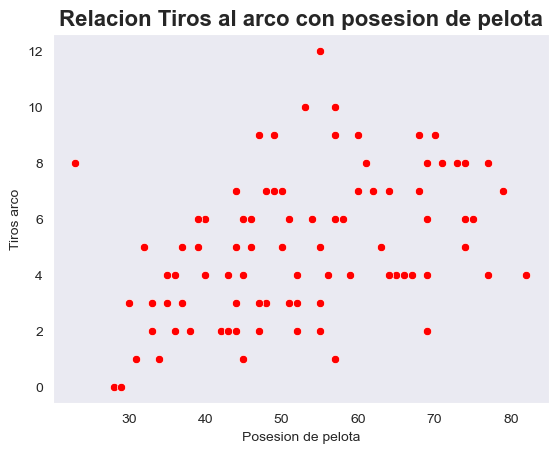

In [6]:
sns.scatterplot (data = df_soloriver, x='posesion_local', y='tiros_arco_local', color='red')
plt.title("Relacion Tiros al arco con posesion de pelota", fontsize=16, fontweight="bold")
plt.xlabel("Posesion de pelota")
plt.ylabel('Tiros arco')
plt.show()


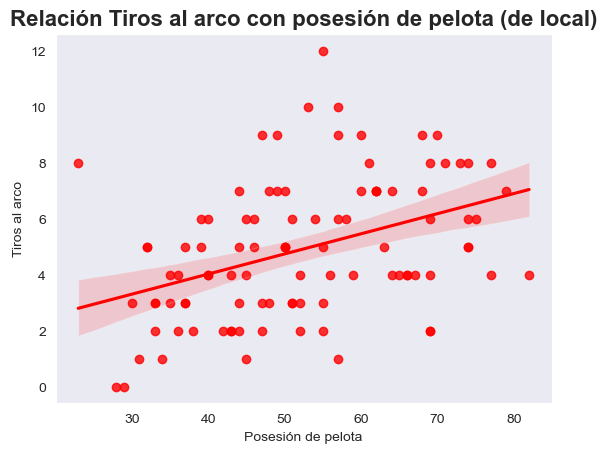

In [7]:

sns.regplot(data=df_soloriver, x='posesion_local', y='tiros_arco_local', color='red')
plt.title("Relación Tiros al arco con posesión de pelota (de local)", fontsize=16, fontweight="bold")
plt.xlabel("Posesión de pelota")
plt.ylabel('Tiros al arco')
plt.show()


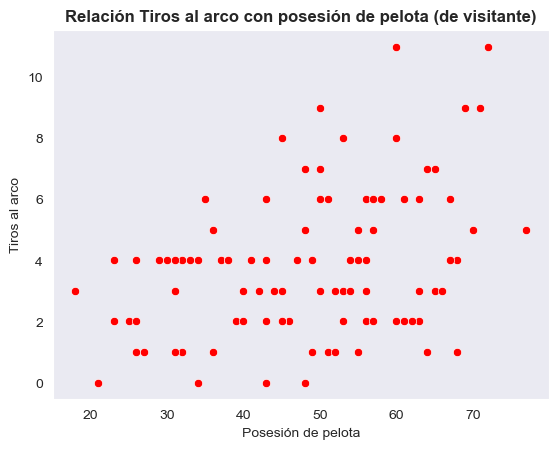

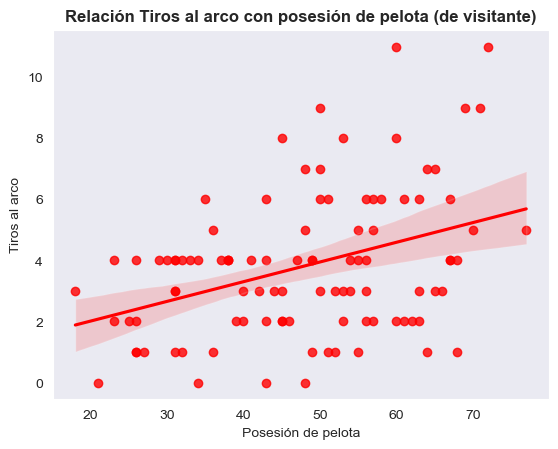

In [8]:
sns.scatterplot (data = df_soloriver, x='posesion_visitante', y='tiros_arco_visitante' , color='red')
plt.title("Relación Tiros al arco con posesión de pelota (de visitante)", fontweight="bold")
plt.xlabel("Posesión de pelota")
plt.ylabel('Tiros al arco')
plt.show()


sns.regplot(data=df_soloriver, x='posesion_visitante', y='tiros_arco_visitante' , color='red')
plt.title("Relación Tiros al arco con posesión de pelota (de visitante)", fontweight="bold")
plt.xlabel("Posesión de pelota")
plt.ylabel('Tiros al arco')
plt.show()



<AxesSubplot:xlabel='posesion_local', ylabel='goles_local'>

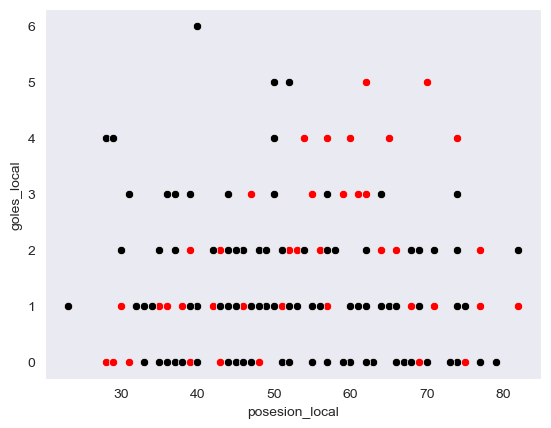

In [9]:
sns.scatterplot (data = df_soloriver, x='posesion_local', y='goles_local' , color='red')
sns.scatterplot (data = df_soloriver, x='posesion_local', y='goles_visitante', color='black')

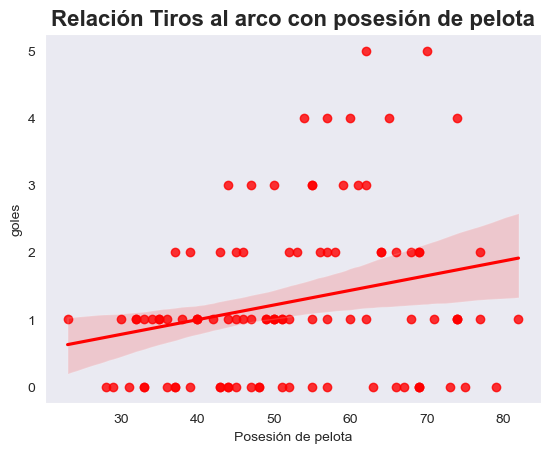

In [10]:
sns.regplot(data=df_soloriver, x='posesion_local', y='goles_local', color='red')
plt.title("Relación Tiros al arco con posesión de pelota", fontsize=16, fontweight="bold")
plt.xlabel("Posesión de pelota")
plt.ylabel('goles')
plt.show()

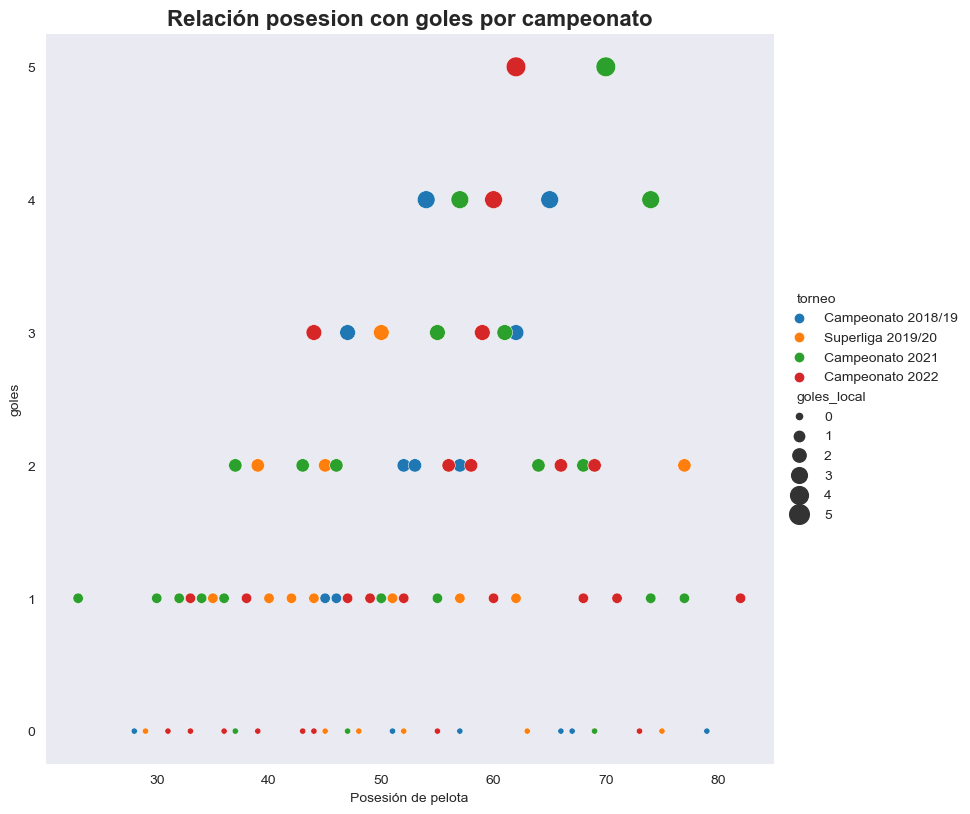

In [11]:
sns.relplot(x="posesion_local", y="goles_local", hue="torneo", size="goles_local",
            sizes=(20, 200), height=8, data=df_soloriver)
plt.title("Relación posesion con goles por campeonato", fontsize=16, fontweight="bold")
plt.xlabel("Posesión de pelota")
plt.ylabel('goles')
plt.show()


 <img src="https://iili.io/HGG3kJf.jpg" alt="bannerparadividir" width="100%">




## **INSIGHTS:**

De los graficos realizados podemos derivar una relacion creciente entre tiros al arco y posesion, es decir a mayor posesion mayor cantidad de tiros al arco.

En principio este indicador nos adelanta que parte de la hipotesis se comienza a cumplir. 
<br><br>


 <img src="https://iili.io/HGG3kJf.jpg" alt="bannerparadividir" width="100%">


## ***DATA WRANGLING***

El objetivo de este proceso de data wrangling es obtener datos limpios y estructurados que puedan ser utilizados para el análisis.

Realizare transformacion y limpieza de los datos intentando asegurar que los datos que vayan a utilizarse sean precisos, completos y estén en un formato adecuado para el análisis.

Comenzare con un analisis simple de datos para obtener informacion de los dataframes utilizados para luego pasar a filtrar y generar dataframes mas optimos.

<br>


In [12]:
df_soloriver.isnull().sum()

torneo                  0
equipo_local            0
equipo_visitante        0
goles_local             0
goles_visitante         0
posesion_local          1
posesion_visitante      1
tiros_arco_local        1
tiros_arco_visitante    1
dtype: int64

***Muy pocos valores nulos.***


In [13]:
df_soloriver.dtypes

torneo                   object
equipo_local             object
equipo_visitante         object
goles_local               int64
goles_visitante           int64
posesion_local          float64
posesion_visitante      float64
tiros_arco_local        float64
tiros_arco_visitante    float64
dtype: object

<br>***Vemos que las variables numericas ya son FLOAT por lo que no es necesario realizar el cambio. Y las variables de texto son objects.***

***Posteriormente realizo filtros para tener columnas mas comodas para el analisis de los datos, unificando las variables local/visitante en las variables posesion, y las variables tiros arco.***

<br><br>

In [14]:
df_river1 = df_riverl[['equipo_local', 'posesion_local']]
df_river2 = df_riverv[['equipo_visitante', 'posesion_visitante']]
df_river2 = df_river2.rename(columns={'equipo_visitante': 'equipo_local', 'posesion_visitante': 'posesion_local'})

df_river3= pd.concat([df_river1, df_river2], axis=0)
df_river3 = df_river3.rename(columns={'equipo_local': 'equipo_analizado', 'posesion_local': 'posesionxpartido'})
df_river3

,equipo_analizado,posesionxpartido
1536,River Plate,79.0
1550,River Plate,67.0
1573,River Plate,65.0
1621,River Plate,66.0
1637,River Plate,51.0
...,...,...
2693,River Plate,62.0
2712,River Plate,57.0
2750,River Plate,56.0
2773,River Plate,61.0


In [15]:
df_river4 = df_riverl[['equipo_local', 'tiros_arco_local']]
df_river5 = df_riverv[['equipo_visitante', 'tiros_arco_visitante']]
df_river5 = df_river5.rename(columns={'equipo_visitante': 'equipo_local', 'tiros_arco_visitante': 'tiros_arco_local'})
df_river6= pd.concat([df_river4, df_river5], axis=0)
df_river6 = df_river6.rename(columns={'equipo_local':'equipo_analizado', 'tiros_arco_local':'tiros_arcoxpartido'})

df_river6


,equipo_analizado,tiros_arcoxpartido
1536,River Plate,7.0
1550,River Plate,4.0
1573,River Plate,4.0
1621,River Plate,4.0
1637,River Plate,3.0
...,...,...
2693,River Plate,2.0
2712,River Plate,2.0
2750,River Plate,4.0
2773,River Plate,2.0


<br>***Asi nos quedan dos dataframe en los que Figura el equipo analizado, la posesion y los tiros al arco del equipo independientemente de su condicion de local o visitante para lograr una relacion directa. Para finalizar realizare un merge de estos dos dataframes limpios para que quede un unico dataframe en donde se pueda ver los valores de posesion y tiros al arco por cada partido independientemente de localia o visitante.***<br><br>



In [16]:
df_completo = df_river6.join(df_river3['posesionxpartido'])
df_completo.reset_index(drop=True)

,equipo_analizado,tiros_arcoxpartido,posesionxpartido
0,River Plate,7.0,79.0
1,River Plate,4.0,67.0
2,River Plate,4.0,65.0
3,River Plate,4.0,66.0
4,River Plate,3.0,51.0
...,...,...,...
95,River Plate,2.0,62.0
96,River Plate,2.0,57.0
97,River Plate,4.0,56.0
98,River Plate,2.0,61.0


<br><br>***Para comprobar que los valores son los adecuados volvemos a traer el primer dataframe para comprobar que los datos son coincidentes en cada partido y usamos los metodos head() y tail(), para comprobar tanto los primeros como los ultimos. El dataframe es df_soloriver. Tener en cuenta que las primeras rows del dataset correspondar a partidos de river como local (head) y las ultimas seran las correspondientes a river como visitante (tail).***<br><br>

In [17]:
df_soloriver.head()

,torneo,equipo_local,equipo_visitante,goles_local,goles_visitante,posesion_local,posesion_visitante,tiros_arco_local,tiros_arco_visitante
1536,Campeonato 2018/19,River Plate,Belgrano,0,0,79.0,21.0,7.0,0.0
1550,Campeonato 2018/19,River Plate,Argentinos,0,0,67.0,33.0,4.0,4.0
1573,Campeonato 2018/19,River Plate,San Martin (SJ),4,1,65.0,35.0,4.0,6.0
1621,Campeonato 2018/19,River Plate,Def y Justicia,0,1,66.0,34.0,4.0,4.0
1637,Campeonato 2018/19,River Plate,Aldosivi,1,0,51.0,49.0,3.0,1.0


In [18]:
df_completo.head()

,equipo_analizado,tiros_arcoxpartido,posesionxpartido
1536,River Plate,7.0,79.0
1550,River Plate,4.0,67.0
1573,River Plate,4.0,65.0
1621,River Plate,4.0,66.0
1637,River Plate,3.0,51.0


***Con el metodo head(), Vemos que el primer partido River jugando de local tuvo una posesion de 79 y 7 tiros al arco y sucesivamente de correlacionan los datos correctamente. (ver columna Tiros_arco_local y posesion_local).***

In [19]:
df_soloriver.tail()

,torneo,equipo_local,equipo_visitante,goles_local,goles_visitante,posesion_local,posesion_visitante,tiros_arco_local,tiros_arco_visitante
2693,Campeonato 2022,Boca Juniors,River Plate,1,0,38.0,62.0,2.0,2.0
2712,Campeonato 2022,San Lorenzo,River Plate,0,1,43.0,57.0,2.0,2.0
2750,Campeonato 2022,Argentinos,River Plate,0,3,44.0,56.0,3.0,4.0
2773,Campeonato 2022,Patronato,River Plate,0,1,39.0,61.0,5.0,2.0
2815,Campeonato 2022,Racing Club,River Plate,1,2,49.0,51.0,9.0,6.0


In [20]:
df_completo.tail()

,equipo_analizado,tiros_arcoxpartido,posesionxpartido
2693,River Plate,2.0,62.0
2712,River Plate,2.0,57.0
2750,River Plate,4.0,56.0
2773,River Plate,2.0,61.0
2815,River Plate,6.0,51.0


<br><br>***Con el metodo tail(), tambien podemos comprobar que los datos estan correctamente correlacionados y en orden. Podemos ver esto relacionando las columnas tiros_arco_visitante y posesion_visitante con los del nuevo dataframe posesionxpartido y tiros_arcoxpartido.***<br><br>

<img src="https://iili.io/HGG3kJf.jpg" alt="banner para dividir" width="100%">




## Analisis univariado:

El análisis univariado en Data Science se refiere al estudio y exploración de una única variable en un conjunto de datos. Es una de las técnicas fundamentales en el análisis de datos, que se realiza con el objetivo de comprender las características y patrones de una variable específica sin considerar la interacción con otras variables.
<br>
<br>

In [21]:
df_completo.describe()

,tiros_arcoxpartido,posesionxpartido
count,99.000000,99.000000
mean,5.383838,60.626263
std,2.514071,9.298437
min,1.000000,31.000000
25%,4.000000,54.500000
50%,5.000000,61.000000
75%,7.000000,67.500000
max,12.000000,82.000000



<br>
<br>
El análisis univariado permite examinar cada variable por separado. A continuación, detallare algunas conclusiones acerca de las variables en analisis.


**TIROS ARCO POR PARTIDO:**

Del analisis del dataset filtrado podemos inferir que:
- La media de los tiros al arco por partido es de 5.38.
- El menor número de tiros al arco en un partido fue de 1.
- El mayor de número de tiros al arco en un partido fue de 12.


**POSESION POR PARTIDO:**
Del analisis del dataset filtrado podemos inferir que:
- la media de la posesión del balón por partido es de 60.63%.
- El menor porcentaje de posesión en un partido fue de 31%.
- El mayor porcentaje de posesión en un partido fue del 82%.

<br>

A continuacion se realizan graficos de distribucion que demuestran los datos mencionados:

<br>

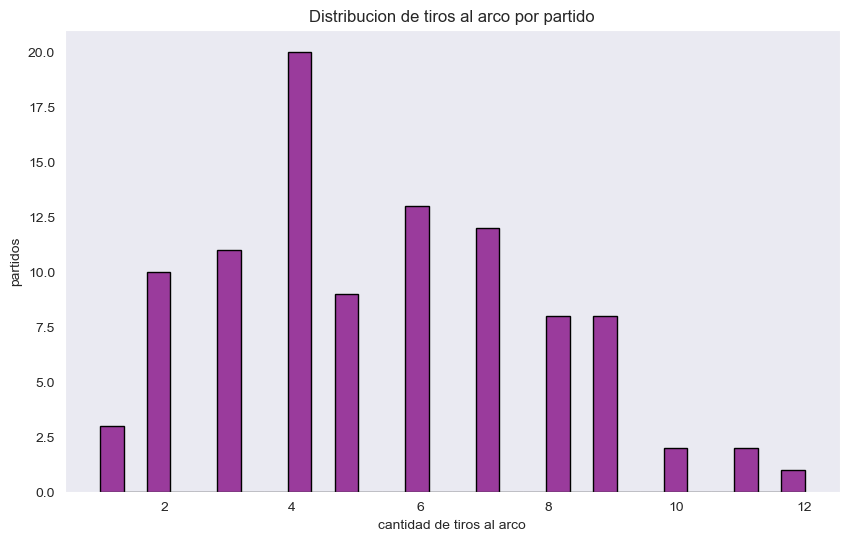

In [22]:
plt.figure(figsize=(10,6))
sns.histplot(df_completo.tiros_arcoxpartido, kde=False, bins=30, color='purple', edgecolor='black')

plt.xlabel('cantidad de tiros al arco')
plt.ylabel('partidos')
plt.title ('Distribucion de tiros al arco por partido')

plt.show()

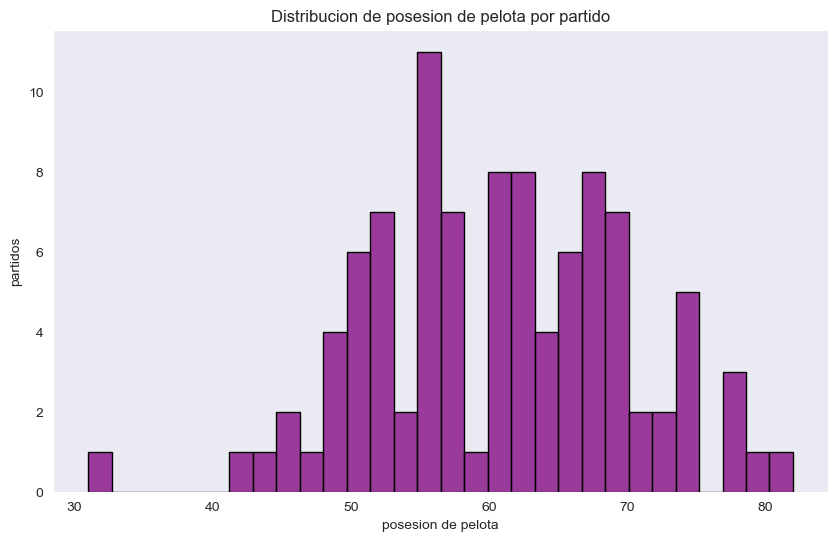

In [23]:
plt.figure(figsize=(10,6))
sns.histplot(df_completo.posesionxpartido, kde=False, bins=30, color='purple', edgecolor='black')
plt.xlabel('posesion de pelota')
plt.ylabel('partidos')
plt.title ('Distribucion de posesion de pelota por partido')
plt.show()

## ANALISIS BIVARIADO:


<br>
El análisis bivariado se refiere a la relación entre dos variables en el conjunto de datos. En este caso, se pueden analizar las relaciones entre los tiros al arco por partido y la posesión por partido.

<br>

Del analisis bivariado, pude llegar a una conclusion acerca de las variables elegidas: 

- Existe una correlacion positiva, pero muy debil entre Posesion de pelota y tiros al arco. Lo que quiere decir que son variables que si bien estan correlacionadas y en los graficos que realice al principio se podia apreciar dicha correlacion, la realidad es que la correlacion es muy debil, como demostrare a continuacion.
<br>
<br>


In [24]:
df_completo.corr()

,tiros_arcoxpartido,posesionxpartido
tiros_arcoxpartido,1.000000,0.152864
posesionxpartido,0.152864,1.000000


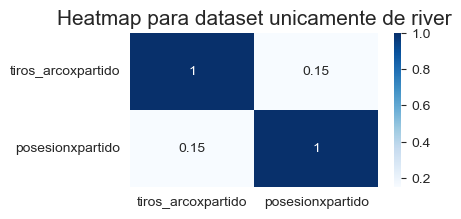

In [25]:
plt.figure(figsize=(4, 2))
sns.heatmap(round(df_completo.corr(),2), annot=True, cmap = 'Blues')
plt.title('Heatmap para dataset unicamente de river', fontsize = 15)
plt.show()


<br>
<br>
Del analisis podemos determinar que si bien existe una correlación positiva entre las variables "tiros_arcoxpartido" y "posesionxpartido", la correlacion es debil ya que el coeficiente de correlacion es 0.15. Por lo que en principio no podemos decir que existe una fuerte correlacion entre las variables.

**La idea primigenia de este analisis era analizar y realizar una regresion lineal sobre esas variables, pero sin embargo, es importante mencionar que los resultados de una regresión lineal pueden ser engañosos si se basan en una correlación débil.**

Razon por la cual, vuelvo a traer los datos de un dataset anterior, en donde se encontraban todos los equipos, utilizando las variables respecto a las estadisticas de partidos teniendo en cuenta al equipo que juega de local:

**'equipo_local', 'posesion_local', 'tiros_arco_local', 'goles_local'**

Hago esto a los fines de buscar correlaciones mas fuertes y apropiadas para poder realizar un modelo de regresion lineal.
<br>
<br>
<br>



In [26]:
df_filtradopos = df_filtrado[['equipo_local', 'posesion_local', 'tiros_arco_local', 'goles_local']]
df_filtradopos

,equipo_local,posesion_local,tiros_arco_local,goles_local
1518,Velez,46.0,4.0,2
1519,Tigre,52.0,4.0,2
1520,Gimnasia (LP),33.0,1.0,1
1521,Union,50.0,3.0,1
1522,Patronato,45.0,4.0,0
...,...,...,...,...
2816,Patronato,48.0,2.0,3
2817,Barracas Central,55.0,4.0,1
2818,Rosario Central,62.0,4.0,1
2819,Tigre,62.0,12.0,1


In [27]:
df_filtradopos.corr()

,posesion_local,tiros_arco_local,goles_local
posesion_local,1.000000,0.146953,-0.062208
tiros_arco_local,0.146953,1.000000,0.470494
goles_local,-0.062208,0.470494,1.000000



<br>
<br>
Al volver a analizar las correlaciones entre las variables, pero esta vez con mayor cantidad de datos y equipos, vemos que se demuestra la misma situacion anterior, es decir, La correlacion entre posesion y tiros al arco es 0.14 (previamente 0.15).

Sin embargo podemos ver que si existe una correlacion moderada (0,47) entre Tiros al arco y goles. Es decir que a mas tiros al arco se anotaran mas goles. Razon por la cual si podriamos realizar un modelo de regresion lineal para predecir cantidad de goles que seria mucho mas preciso que entre las variables posesion y tiros al arco.

Realizo grafico de heatmap para ver esta situacion de forma mas clara.

<br>
<br>


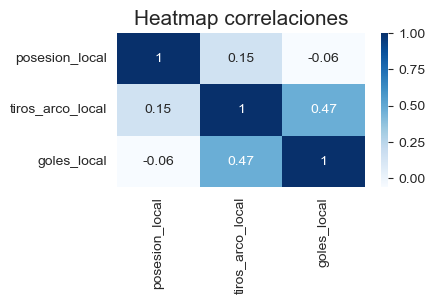

In [28]:
plt.figure(figsize=(4, 2))

sns.heatmap(round(df_filtradopos.corr(),2), annot=True, cmap = 'Blues')
plt.title('Heatmap correlaciones', fontsize = 15)
plt.show()

## ANALISIS MULTIVARIADO:


<br>
<br>
Debido a las conclusiones arribadas mediante el analisis bivariado, tome la desicion de incorporar mas datos en el dataset a los fines de realizar el analisis mulivariado. Ya que el dataset anterior, solo tenia dos variables y un unico equipo (river plate).

Por lo tanto, realizare primero un filtrado de los datasets primigenios para obtener todas las estadisticas de todos los equipos jugando de local. (recordemos que ciertas estadisticas comienzan a aparecer en el dataset a partir del campeonato 2018/2019).

Posteriormente analizare correlaciones, graficare un heatmap para verlas mas claramente y posteriormente realizare graficos para analisis multivariado.

<br>
<br>


In [29]:
df_planilla
df_2a = df_planilla [df_planilla['torneo'] == 'Campeonato 2018/19']
df_3a= df_planilla [df_planilla['torneo'] == 'Superliga 2019/20'] 
df_4a= df_planilla [df_planilla['torneo'] == 'Campeonato 2021'] 
df_5a= df_planilla [df_planilla['torneo'] == 'Campeonato 2022'] 
df_filtrado2 = pd.concat([df_2a, df_3a, df_4a, df_5a], axis=0) 
df_filtradolocal = df_filtrado2 [['equipo_local', 'goles_local', 'posesion_local', 'tiros_arco_local', 'intentos_local', 'faltas_local',  'tiro_esquina_local', 'amarillas_local', 'rojas_local', 'valor_mercado_local', 'edad_media_local', 'proporcion_zurdos_local']]

In [30]:
df_filtradolocal.corr()

,goles_local,posesion_local,tiros_arco_local,intentos_local,faltas_local,tiro_esquina_local,amarillas_local,rojas_local,valor_mercado_local,edad_media_local,proporcion_zurdos_local
goles_local,1.000000,-0.062208,0.470494,0.118612,0.014256,-0.094150,-0.090613,-0.061365,0.100956,0.018910,0.009176
posesion_local,-0.062208,1.000000,0.146953,0.389747,-0.166168,0.382008,-0.081687,-0.091523,0.246922,0.007878,-0.061223
tiros_arco_local,0.470494,0.146953,1.000000,0.587491,-0.090423,0.241672,-0.080823,-0.080824,0.113513,0.022446,0.018804
intentos_local,0.118612,0.389747,0.587491,1.000000,-0.198511,0.468994,-0.107089,-0.107826,0.072011,0.000425,-0.009483
faltas_local,0.014256,-0.166168,-0.090423,-0.198511,1.000000,-0.123881,0.358246,0.034652,-0.051135,-0.043933,-0.020199
tiro_esquina_local,-0.094150,0.382008,0.241672,0.468994,-0.123881,1.000000,-0.048348,-0.037733,0.122110,0.002358,0.019670
amarillas_local,-0.090613,-0.081687,-0.080823,-0.107089,0.358246,-0.048348,1.000000,0.204758,-0.051823,-0.000484,0.014778
rojas_local,-0.061365,-0.091523,-0.080824,-0.107826,0.034652,-0.037733,0.204758,1.000000,-0.006271,-0.034737,-0.004891
valor_mercado_local,0.100956,0.246922,0.113513,0.072011,-0.051135,0.122110,-0.051823,-0.006271,1.000000,-0.097083,-0.032494
edad_media_local,0.018910,0.007878,0.022446,0.000425,-0.043933,0.002358,-0.000484,-0.034737,-0.097083,1.000000,0.271874


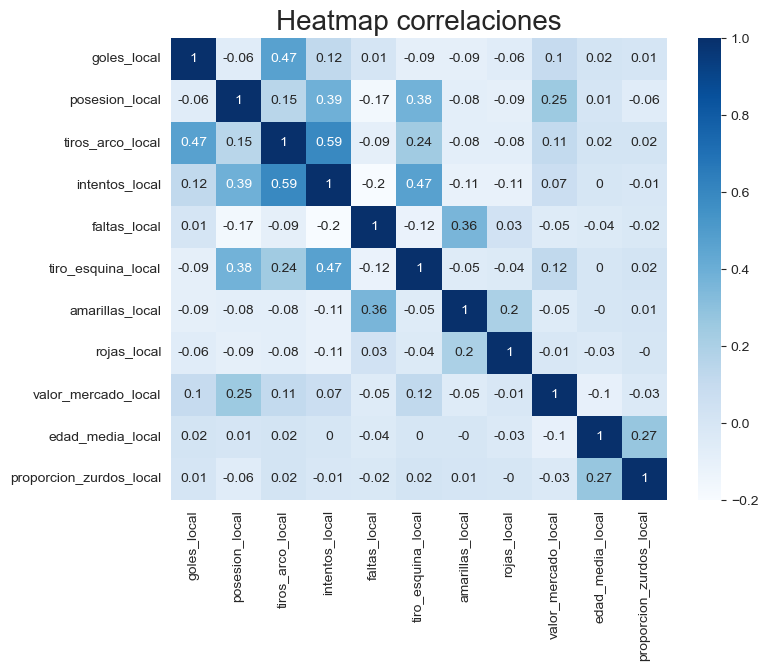

In [31]:
plt.figure(figsize=(8, 6))
sns.heatmap(round(df_filtradolocal.corr(),2), annot=True, cmap = 'Blues')
plt.title('Heatmap correlaciones', fontsize = 20)
plt.show()


<br>
<br>
Analisis Correlaciones:
<br>

Podemos apreciar que hay variables en las que existe correlacion, pero no necesariamente causalidad, por ej. Entre valor de mercado y proporcion de zurdos.

Entre las correlaciones con mayor fuerza podemos tambien destacar la variable cantidad de faltas contra la variable tarjetas amarillas (0.36).

Paso a realizar graficos para analisis multivariado con respecto a la correlacion causal mas fuerte que en este caso es tiros arco local y goles local.

<br>
<br>

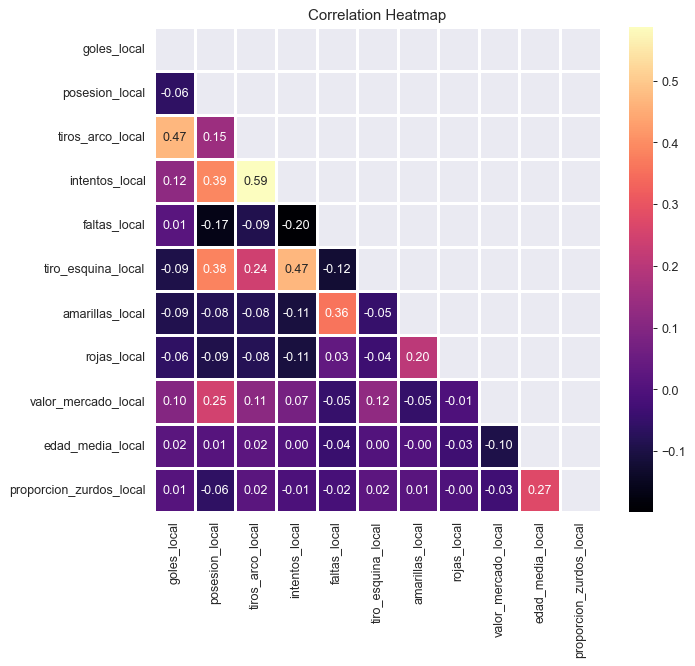

In [32]:
plt.figure(dpi = 90,figsize= (8,7))
mask = np.triu(np.ones_like(df_filtradolocal.corr(),dtype = bool))
sns.heatmap(df_filtradolocal.corr(),mask = mask, fmt = ".2f",annot=True,lw=1,cmap = 'magma')
plt.yticks(rotation = 0)
plt.xticks(rotation = 90)
plt.title('Correlation Heatmap')
plt.show()


<br>
Para realizar un grafico de scatterplot mas entendible con multiples variables, selecciono varios equipos de los mas importantes a los fines de realizar un grafico mas amigable. 

<br>
<br>

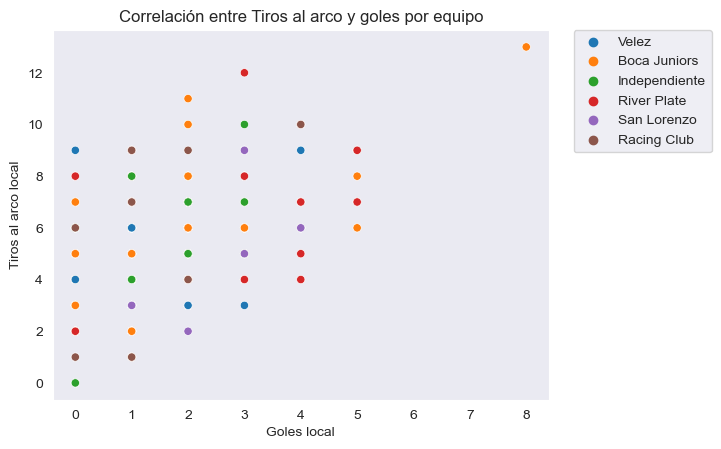

In [33]:
equipos = ['Boca Juniors', 'River Plate', 'Velez', 'Independiente', 'Racing Club', 'San Lorenzo', 'Estudiante'] # lista de los equipos seleccionados
df_equipos = df_filtradolocal[df_filtradolocal['equipo_local'].isin(equipos)]
sns.scatterplot(x='goles_local', y='tiros_arco_local', hue='equipo_local', data=df_equipos)
plt.xlabel('Goles local')
plt.ylabel('Tiros al arco local')
plt.title('Correlación entre Tiros al arco y goles por equipo')
plt.legend(bbox_to_anchor=(1.05, 1),loc='upper left', borderaxespad=0.)
plt.show()

<br>
Por ultimo para realizar el analisis multivariado. Realizo un grafico demostrando la correlacion graficando una recta por cada uno de los equipos, con color e identificacion para demostrar que independientemente del equipo existe la correlacion entre tiros al arco y goles.
<br>
<br>


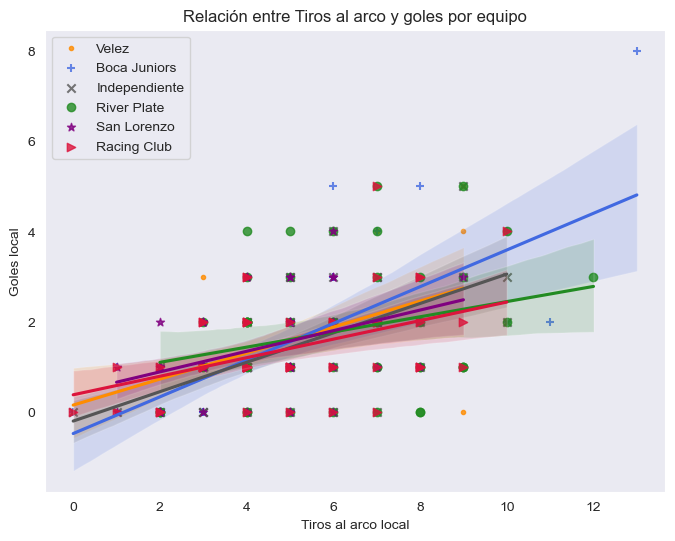

In [34]:
fig, ax = plt.subplots(figsize=(8, 6))
colors = ['darkorange', 'royalblue', '#555555', 'forestgreen', 'purple', 'crimson']
markers = ['.', '+', 'x','o', '*', '>']

for i, value in enumerate(df_equipos.equipo_local.unique()):
    ax = sns.regplot(x="tiros_arco_local", y="goles_local", ax=ax,
                     color=colors[i],
                     marker=markers[i], 
                     data=df_equipos[df_equipos.equipo_local == value],
                     label=value)

ax.legend(loc='best')
plt.xlabel("Tiros al arco local")
plt.ylabel("Goles local")
plt.title("Relación entre Tiros al arco y goles por equipo")
plt.show()


<img src="https://iili.io/HGG3kJf.jpg" alt="banner para dividir" width="100%">


## MACHINE LEARNING: APRENDIZAJE SUPERVISADO (INICIAL)

Realizamos un modelo de ML con el dataset filtrado.



In [35]:
# preparacion del dataset para el modelo - primero utilizo get dummies para numerizar las variables.

df_equipos_dummy = pd.get_dummies(df_equipos, drop_first=True)
df_equipos_dummy = df_equipos_dummy.reset_index()
df1 = df_equipos_dummy.drop('index', axis=1)

In [36]:
# al intentar el modelo dio errores que al realizar el dropna se solucionaron.
df2 = df1.dropna()


In [37]:
# paso a paso
# separo en X,y - la variable a predecir es 'goles_local'.

X = df2.drop('goles_local', axis=1)
y = df2.goles_local

# elimino la columna goles y el df resultando seria x - la columna goles seria la Y

In [38]:
# separo en train y test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42) 

# elijo el modelo

model = LinearRegression()

# entreno el modelo

model.fit(X_train, y_train)

LinearRegression()

In [39]:
# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

In [40]:
# Evaluar el rendimiento del modelo utilizando el error cuadrado medio (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Error cuadrado medio (MSE): {mse}")

# Calcular el MAE (Error Absoluto Medio)
mae = mean_absolute_error(y_test, y_pred)
print(f"Error Absoluto Medio (MAE): {mae}")



Error cuadrado medio (MSE): 1.203061267528175
Error Absoluto Medio (MAE): 0.8189026518021931


In [41]:
# mediante una iteracion realizo el modelo linear regression y SVR

models = [LinearRegression(), SVR()]

for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print (model.__class__.__name__)
    print(f"Error cuadrado medio (MSE): {mse}")
    mae = mean_absolute_error(y_test, y_pred)
    print(f"Error Absoluto Medio (MAE): {mae}")
    

LinearRegression
Error cuadrado medio (MSE): 1.203061267528175
Error Absoluto Medio (MAE): 0.8189026518021931
SVR
Error cuadrado medio (MSE): 1.5168129563405945
Error Absoluto Medio (MAE): 0.8909115179372933


Renovando las metricas desde SKlearn.

In [42]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    

Mean Absolute Error: 0.8909115179372933
Mean Squared Error: 1.5168129563405945
Root Mean Squared Error: 1.23158960548577


### VOY A INTRODUCIR MAYOR CANTIDAD DE DATOS AL DATASET PARA VER SI SE PRODUCEN VARIACIONES EN LAS METRICAS.



In [43]:
#Comienzo nuevamente desdeel dataset principal con 2821 rows × 34 columns.
#Para testear la variacion en los resultados voy a usar todas las columnas de datos de LOCAL pero de todos los equipos para tener mayor cantidad de datos.}


df_planilla
df_planilla2 = df_planilla [['equipo_local', 'goles_local', 'posesion_local', 'tiros_arco_local', 'intentos_local', 'faltas_local',  'tiro_esquina_local', 'amarillas_local', 'rojas_local', 'valor_mercado_local', 'edad_media_local', 'proporcion_zurdos_local']]


In [44]:
# procedo con get_dummies y dropna para que los datos puedan ser analizados por el modelo.
df_equipos_dummy = pd.get_dummies(df_planilla2, drop_first=True)
df_equipos_dummy = df_equipos_dummy.reset_index()
dfnuevo= df_equipos_dummy.drop('index', axis=1)
dfnuevosinnan= dfnuevo.dropna()
# luego de la limpieza de nan y get_dummies quedan 1496 rows × 48 columns


In [45]:
#repito el modelo con el nuevo df.

X = dfnuevosinnan.drop('goles_local', axis=1)
y = dfnuevosinnan.goles_local

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42) 

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)


In [46]:
#aqui realizare el for para una comparativa de los valores anteriores con los nuevos.

print("Resultados anteriores:\nLinearRegression\nError cuadrado medio (MSE): 1.203061267528175\nError Absoluto Medio (MAE): 0.8189026518021931\nSV\nError cuadrado medio (MSE): 1.5168129563405945\nError Absoluto Medio (MAE): 0.8909115179372933\n\nResultados Nuevos:\n")
      
models = [LinearRegression(), SVR()]

for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print (model.__class__.__name__)
    print(f"Error cuadrado medio (MSE): {mse}")
    mae = mean_absolute_error(y_test, y_pred)
    print(f"Error Absoluto Medio (MAE): {mae}")
    print('coeficiente r2: ', r2_score(y_test, y_pred))

    


Resultados anteriores:
LinearRegression
Error cuadrado medio (MSE): 1.203061267528175
Error Absoluto Medio (MAE): 0.8189026518021931
SV
Error cuadrado medio (MSE): 1.5168129563405945
Error Absoluto Medio (MAE): 0.8909115179372933

Resultados Nuevos:

LinearRegression
Error cuadrado medio (MSE): 0.8687590698676861
Error Absoluto Medio (MAE): 0.7459335903201781
coeficiente r2:  0.2661536836540266
SVR
Error cuadrado medio (MSE): 1.190373476066385
Error Absoluto Medio (MAE): 0.8195873830624227
coeficiente r2:  -0.00551605247737097


<br><br>
Podemos apreciar que al agregar mayor cantidad de datos al modelo, los resultados nuevos indican una mejora en la calidad de los modelos en comparación con los resultados anteriores.
Ambos modelos muestran una reducción en el error cuadrado medio (MSE) y el error absoluto medio (MAE), lo cual es positivo.

Sin embargo las metricas del modelo no son alentadoras, los errores teniendo en cuenta que estamos intentando predecir cantidad de goles es muy alto y el r2 es extremadamente bajo lo que implicaria que el modelo no puede predecir la variable y.
<br><br><br>



In [47]:
# siendo todas las variables numericas y al no ser necesaria la variable 'equipo_local' para el modelo,
# directamente retiro esa variable del modelo y procedo a probar el modelo.


df_planilla3 = df_planilla [['goles_local', 'posesion_local', 'tiros_arco_local', 'intentos_local', 'faltas_local',  'tiro_esquina_local', 'amarillas_local', 'rojas_local', 'valor_mercado_local', 'edad_media_local', 'proporcion_zurdos_local']]
df_planilla3 = df_planilla3.dropna()

In [48]:
X = df_planilla3.drop('goles_local', axis=1)
y = df_planilla3.goles_local

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42) 

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [49]:
models = [LinearRegression(), SVR()]

for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print (model.__class__.__name__)
    print(f"Error cuadrado medio (MSE): {mse}")
    mae = mean_absolute_error(y_test, y_pred)
    print(f"Error Absoluto Medio (MAE): {mae}")
    print('coeficiente r2: ', r2_score(y_test, y_pred))


LinearRegression
Error cuadrado medio (MSE): 0.8151494427229604
Error Absoluto Medio (MAE): 0.718590911885195
coeficiente r2:  0.3114380769517333
SVR
Error cuadrado medio (MSE): 1.1905925575074632
Error Absoluto Medio (MAE): 0.8197125796059687
coeficiente r2:  -0.00570111196519818


<br>
Sin la variable "equipo_local" y sin utilizar get_dummies, mejoran un poco las metricas del modelo, el r2 mejora un poco pero sigue siendo muy bajo.
<br>

<img src="https://iili.io/HGG3kJf.jpg" alt="banner para dividir" width="100%">

## CAMBIO A MODELO DE CLASIFICACION:

<br>
<br>


Como metodo para solucionar el problema, debido a las dificultades de realizar predicciones en cuestiones deportivas, intentare tomar un rumbo distinto eligiendo otro modelo, dejando de lado la regresion y pasando a un modelos de clasificacion.

Intentando en vez de predecir cuantos goles va a realizar un equipo, reducirlo a un modelo mas simple intentando clasificar si hara por lo menos un gol en el partido.

<br>
<br>




In [50]:
X = df2.drop('goles_local', axis=1)
y = df2.goles_local

y_copy = y.copy()

# Realizar la transformación de valores en la columna y_copy

y_copy.loc[y_copy > 0] = 1

print(y_copy.unique())

# Dividir los datos en conjuntos de entrenamiento y prueba

X_train, X_test, y_train, y_test = train_test_split(X, y_copy, test_size=0.2, random_state=42)

# Crear el modelo Random Forest

model = RandomForestClassifier()

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)

# Entrenar el modelo con el conjunto de entrenamiento

model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba

y_pred = model.predict(X_test)

# Calcular la precisión del modelo

accuracy = accuracy_score(y_test, y_pred)

print('Precisión del modelo:', accuracy)


[1 0]
Precisión del modelo: 0.8166666666666667


In [51]:
from sklearn.neighbors import KNeighborsClassifier 
X = df2.drop('goles_local', axis=1)
y = df2.goles_local

# Copiar la columna y y realizar la transformación de valores en la columna y_copy
y_copy = y.copy()
y_copy.loc[y_copy > 0] = 1

print(y_copy.unique())

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y_copy, test_size=0.2, random_state=42)

# Crear el modelo Random Forest
rf_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)

# Entrenar el modelo Random Forest con el conjunto de entrenamiento
rf_model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba con el modelo Random Forest
y_pred_rf = rf_model.predict(X_test)

# Calcular la precisión del modelo Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print('Precisión del modelo Random Forest:', accuracy_rf)

# Crear el modelo KNN
knn_model = KNeighborsClassifier(n_neighbors=5)

# Entrenar el modelo KNN con el conjunto de entrenamiento
knn_model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba con el modelo KNN
y_pred_knn = knn_model.predict(X_test)

# Calcular la precisión del modelo KNN
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print('Precisión del modelo KNN:', accuracy_knn)

# Crear el modelo de Regresión Logística
lr_model = LogisticRegression(max_iter=1000)

# Entrenar el modelo de Regresión Logística con el conjunto de entrenamiento
lr_model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba con el modelo de Regresión Logística
y_pred_lr = lr_model.predict(X_test)

# Calcular la precisión del modelo de Regresión Logística
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print('Precisión del modelo de Regresión Logística:', accuracy_lr)


[1 0]
Precisión del modelo Random Forest: 0.8166666666666667
Precisión del modelo KNN: 0.75
Precisión del modelo de Regresión Logística: 0.8333333333333334


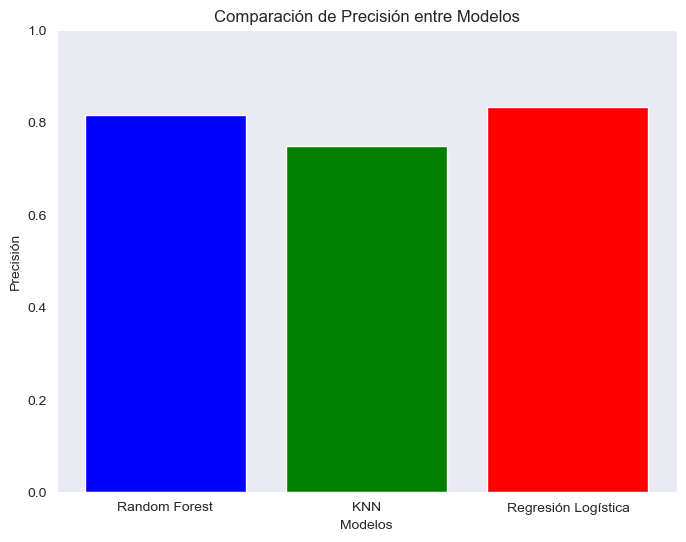

In [52]:
models = ['Random Forest', 'KNN', 'Regresión Logística']
accuracies = [accuracy_rf, accuracy_knn, accuracy_lr]

plt.figure(figsize=(8, 6))  # Tamaño del gráfico más grande
plt.bar(models, accuracies, color=['blue', 'green', 'red'])
plt.xlabel('Modelos')
plt.ylabel('Precisión')
plt.title('Comparación de Precisión entre Modelos')
plt.ylim(0.0, 1.0)  # Ajustar el rango del eje y para mejorar la visualización de las diferencias
plt.show()


Al cambiar de modelo y de rumbo de analisis, la precision del modelo sube notablemente.

## INGENIERIA DE ATRIBUTOS Y SELECCION DE VARIABLES:


In [53]:
# validacion simple
y_pred = rf_model.predict(X_test)
# Generar el reporte
report = classification_report(y_true=y_test, y_pred=y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.33      0.10      0.15        10
           1       0.84      0.96      0.90        50

    accuracy                           0.82        60
   macro avg       0.59      0.53      0.53        60
weighted avg       0.76      0.82      0.77        60



In [54]:
# cross validation random forest (rf_model)
scores = cross_val_score(rf_model, X, y_copy, cv=5)
mean_accuracy = np.mean(scores)
std_accuracy = np.std(scores)

print('Precisión media:', mean_accuracy)
print('Desviación estándar:', std_accuracy)

Precisión media: 0.7986440677966102
Desviación estándar: 0.01067093900841887


In [55]:
# Cross validation regresion logistica (Lr_model)
cv_scores = cross_val_score(lr_model, X_train, y_train, cv=5, scoring='accuracy')
print('Precisión media:', np.mean(cv_scores))

Precisión media: 0.8023936170212765


La precisión media obtenida fue del 79.9% en el caso de Random Forest y de 80% en el caso de Regresion Logistica, estos resultados similares. Implican una alta capacidad de predecir con una baja desviacion que implica consistencia en el rendimiento del modelo.


In [56]:
#stratified k-fold
skf = StratifiedKFold(n_splits=15, random_state=42, shuffle=True)


In [57]:
list_ac = []
for train_index, test_index in skf.split(X, y_copy):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y_copy.iloc[train_index], y_copy.iloc[test_index]
  
    rf_model.fit(X_train, y_train)
    y_pred = rf_model.predict(X_test)
  
    accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
    print('Iteracion:', len(list_ac)+1, ' Accuracy:', accuracy)
    list_ac.append(accuracy)

mean_accuracy = np.mean(list_ac)
print('Accuracy promedio:', mean_accuracy)

Iteracion: 1  Accuracy: 0.8
Iteracion: 2  Accuracy: 0.8
Iteracion: 3  Accuracy: 0.8
Iteracion: 4  Accuracy: 0.85
Iteracion: 5  Accuracy: 0.9
Iteracion: 6  Accuracy: 0.85
Iteracion: 7  Accuracy: 0.85
Iteracion: 8  Accuracy: 0.7
Iteracion: 9  Accuracy: 0.8
Iteracion: 10  Accuracy: 0.8
Iteracion: 11  Accuracy: 0.75
Iteracion: 12  Accuracy: 0.7
Iteracion: 13  Accuracy: 0.8
Iteracion: 14  Accuracy: 0.8421052631578947
Iteracion: 15  Accuracy: 0.8421052631578947
Accuracy promedio: 0.8056140350877193


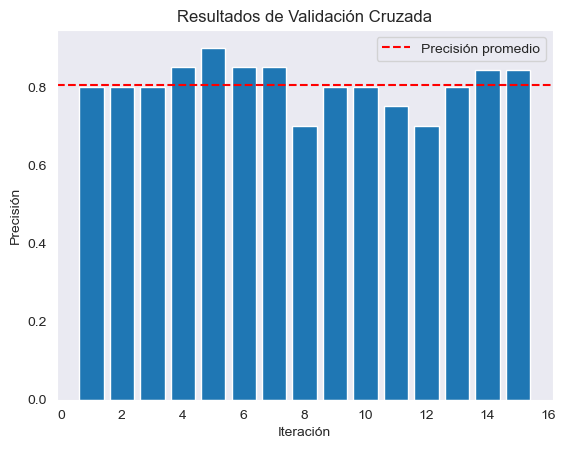

In [58]:
iterations = range(1, len(list_ac)+1)
plt.bar(iterations, list_ac)
plt.axhline(mean_accuracy, color='red', linestyle='--', label='Precisión promedio')
plt.xlabel('Iteración')
plt.ylabel('Precisión')
plt.title('Resultados de Validación Cruzada')
plt.legend()
plt.show()

Los resultados obtenidos muestran que el modelo RandomForestClassifier tiene un desempeño promedio de precisión del 80.2% en la validación cruzada con Stratified K-Folds. Las iteraciones individuales mostraron variabilidad en la precisión, con valores que oscilan entre 66.7% y 86.7%.

### ENTREGABLE OPCIONAL 

In [59]:
X = df2.drop('goles_local', axis=1)
y = df2.goles_local
y_copy = y.copy()
y_copy.loc[y_copy > 0] = 1
print(y_copy.unique())
X_train, X_test, y_train, y_test = train_test_split(X, y_copy, test_size=0.2, random_state=42)
model = RandomForestClassifier()
model = RandomForestClassifier(n_estimators=100, max_depth=8, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Precisión del modelo:', accuracy)

[1 0]
Precisión del modelo: 0.8


LOS ESTIMADORES NO HACEN MUCHA DIFERENCIA PERO SI SUBO EL MAX DEPTH, el accuracy sigue en 0.81 hasta llegar a 8 y ya empieza a disminuir lo que implica que el mejor punto entre bias y varianza estaria en 7.

### BUSQUEDA DE MEJORA DE HIPERPARAMETROS:
<br>
Realizo un Gridsearch para buscar los mejores hiperparametros posibles.

<br>
<br>

In [60]:
from sklearn.model_selection import train_test_split, GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10, 15],
}
# HACER UN GRIDSEARCH PARA BUSCAR LOS MEJORES PARAMETROS.
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Obtener los resultados de la búsqueda
best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_

print("Mejores hiperparámetros encontrados:", best_params)
print("Precisión del modelo con mejores hiperparámetros:", best_accuracy)



Mejores hiperparámetros encontrados: {'max_depth': 5, 'n_estimators': 100}
Precisión del modelo con mejores hiperparámetros: 0.7984042553191488


<br>
realizamos el modelo con la modificacion de los hiperparametros:
<br>
<br>



In [61]:

X = df2.drop('goles_local', axis=1)
y = df2.goles_local
y_copy = y.copy()
y_copy.loc[y_copy > 0] = 1

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y_copy, test_size=0.2, random_state=42)

# Definir el modelo con los mejores hiperparámetros encontrados
mejor_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)

# Entrenar el modelo con todo el conjunto de entrenamiento
mejor_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = mejor_model.predict(X_test)

# Calcular la precisión del modelo en el conjunto de prueba
accuracy = accuracy_score(y_test, y_pred)
print('Precisión del modelo en el conjunto de prueba:', accuracy)

Precisión del modelo en el conjunto de prueba: 0.8166666666666667


<img src="https://iili.io/HGG3kJf.jpg" alt="banner para dividir" width="100%">

### CURVA ROC:

La curva ROC permite evaluar la capacidad de clasificación de un modelo, analizar su sensibilidad y especificidad en diferentes umbrales de decisión, comparar múltiples modelos y determinar su rendimiento frente a conjuntos de datos con clases desequilibradas.
<br><br>
<br>




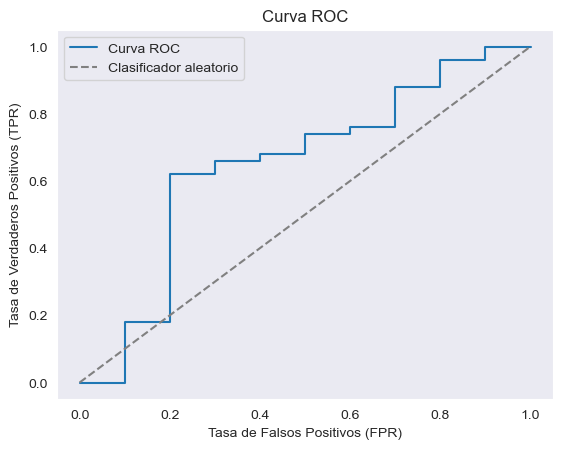

ROC AUC = 0.648


In [62]:

X = df2.drop('goles_local', axis=1)
y = df2.goles_local
y_copy = y.copy()
y_copy.loc[y_copy > 0] = 1

X_train, X_test, y_train, y_test = train_test_split(X, y_copy, test_size=0.2, random_state=42)

mejor_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)

mejor_model.fit(X_train, y_train)

y_probs = mejor_model.predict_proba(X_test)[:, 1]

# Calcular el AUC (Área bajo la curva ROC)
auc = roc_auc_score(y_test, y_probs)

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Graficar la curva ROC
plt.plot(fpr, tpr, label='Curva ROC')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Clasificador aleatorio')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend()
plt.show()

print ("ROC AUC =", auc)

<br>
El valor de roc_auc (área bajo la curva ROC) de 0.65 indica que el modelo tiene una capacidad de discriminación razonable, pero no es excelente. Un valor de 0.5 representa una clasificación aleatoria, mientras que un valor de 1.0 indica una clasificación perfecta. En este caso, el valor de 0.66 sugiere que el modelo puede distinguir entre clases positivas y negativas mejor que una clasificación aleatoria, pero aún puede haber margen de mejora para obtener una clasificación más precisa.
<br>
<br>